# Time series analysis

[Datacamp](https://campus.datacamp.com/courses/time-series-analysis-in-python).



In [22]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats


In [2]:
stocks_and_bonds = pd.read_csv('../data/stocks_and_bonds.csv')
stocks_and_bonds.set_index('observation_date', inplace=True)
stocks_and_bonds.index = pd.to_datetime(stocks_and_bonds.index)
stocks_and_bonds.head()

,SP500,US10Y
observation_date,,
2007-06-11,1509.12,5.14
2007-06-12,1493.00,5.26
2007-06-13,1515.67,5.20
2007-06-14,1522.97,5.23
2007-06-15,1532.91,5.16


In [3]:
series = stocks_and_bonds.pct_change()
series.head()

,SP500,US10Y
observation_date,,
2007-06-11,NaN,NaN
2007-06-12,-0.010682,0.023346
2007-06-13,0.015184,-0.011407
2007-06-14,0.004816,0.005769
2007-06-15,0.006527,-0.013384


In [4]:
correlation = series.corr()
print("Correlation of stocks and interest rates: ", correlation)

Correlation of stocks and interest rates:            SP500     US10Y
SP500  1.000000  0.411945
US10Y  0.411945  1.000000


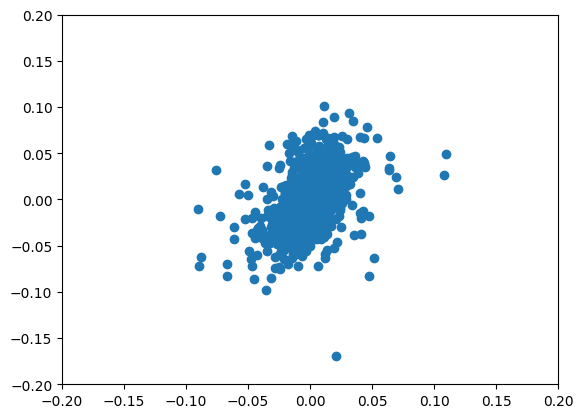

In [5]:
plt.scatter(series['SP500'], series['US10Y'])
plt.xlim(-0.2, 0.2)
plt.ylim(-0.2, 0.2)
plt.show()

# Linear regression

In [6]:
df = pd.read_csv('../data/regression_example_data.csv')
df.head()

,x,y
0,1.281155,-0.835129
1,-0.612631,-0.061004
2,0.933222,-0.194677
3,2.269327,-2.461142
4,-1.427691,1.040073


In [7]:
x = df['x']
y = df['y']

In [8]:
df1 = sm.add_constant(df['x'].to_frame())
mdl = sm.OLS(y, df1).fit()
print(mdl.params)
print(mdl.summary())

const   -0.005248
x       -0.907995
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     4471.
Date:                Fri, 01 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:55:26   Log-Likelihood:                -560.10
No. Observations:                1000   AIC:                             1124.
Df Residuals:                     998   BIC:                             1134.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

In [9]:
np.polyfit(x, y, deg=1)

array([-0.90799455, -0.00524843])

In [10]:
mdl = stats.linregress(x, y)
print(mdl)

LinregressResult(slope=-0.9079945467703991, intercept=-0.005248433747844342, rvalue=-0.9041749130497254, pvalue=0.0, stderr=0.01357871106000873, intercept_stderr=0.013413804850284882)


# Autocorrelation

In [11]:
df = pd.read_csv('../data/stocks_and_bonds.csv')
df.set_index('observation_date', inplace=True)
df.index = pd.to_datetime(df.index)
sp500 = df['SP500']
sp500.head()

observation_date
2007-06-11    1509.12
2007-06-12    1493.00
2007-06-13    1515.67
2007-06-14    1522.97
2007-06-15    1532.91
Name: SP500, dtype: float64

In [12]:
sp500_monthly = sp500.resample(rule='M').last()
sp500_monthly = sp500_monthly.pct_change()
sp500_monthly.head()

observation_date
2007-06-30         NaN
2007-07-31   -0.031982
2007-08-31    0.012864
2007-09-30    0.035794
2007-10-31    0.014822
Freq: M, Name: SP500, dtype: float64

In [13]:
auto_correlation = sp500_monthly.autocorr()  # lag 1
auto_correlation

0.15437392286678955

 # Autocorrelation function (ACF)

In [18]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

df = pd.read_csv('../data/earnings_timeseries.csv')
df.set_index('Date', inplace=True)
df.index = pd.to_datetime(df.index)
df.head()

,Earnings
Date,
2007-01-01,-0.36
2007-04-01,-0.38
2007-07-01,0.07
2007-10-01,1.85
2008-01-01,-0.34


[ 1.         -0.22122696 -0.39856504 -0.26615093  0.83479804 -0.1901038
 -0.3475634  -0.23140368  0.71995993 -0.15661007 -0.29766783 -0.22097189
  0.61656933 -0.15022869 -0.27922022 -0.22465946  0.5725259 ]


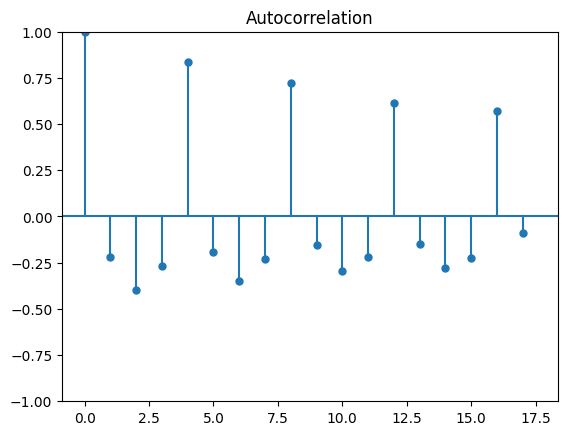

In [19]:
# Compute the ACF array of HRB
acf_array = acf(df)
print(acf_array)

# Plot the ACF function
plot_acf(df, alpha=1)
plt.show()

## Confidence intervals

The auto-correlation for lag = 1 is -0.24
The approximate confidence interval for lag = 1 is +/- 0.30


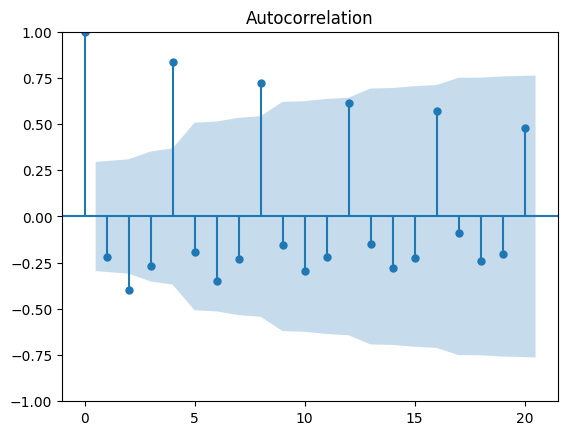

In [25]:
auto_correlation = df['Earnings'].autocorr()  # lag = 1
print("The auto-correlation for lag = 1 is %4.2f" % auto_correlation)

# Compute the approximate confidence interval
# 95% of a normal curve is between +1.96 and -1.96 standard deviations from the mean
n_obs = len(df)
conf = 1.96 / math.sqrt(n_obs)
print("The approximate confidence interval for lag = 1 is +/- %4.2f" % conf)

# Plot the auto-correlation function with 95% confidence intervals and 20 lags using plot_acf
plot_acf(df['Earnings'], alpha=0.05, lags=20)
plt.show()

# White noise


* Definition (one viable one)
    * Constant mean,
    * Constant variance, 
    * Zero auto-correlation at all lags.
* Normal distribution => Gaussian white noise.
* Stock returns are often modeled as white noise.

The mean is 0.019 and the standard deviation is 0.052


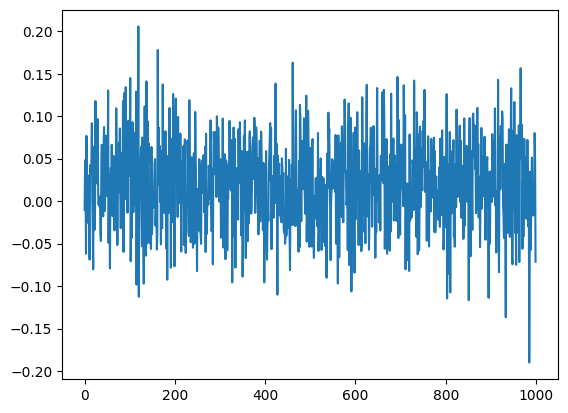

In [27]:
# Generate white noise series
series = np.random.normal(loc=0.02, scale=0.05, size=1000)
mean = np.mean(series)
std = np.std(series)
print("The mean is %5.3f and the standard deviation is %5.3f" % (mean, std))
plt.plot(series)
plt.show()

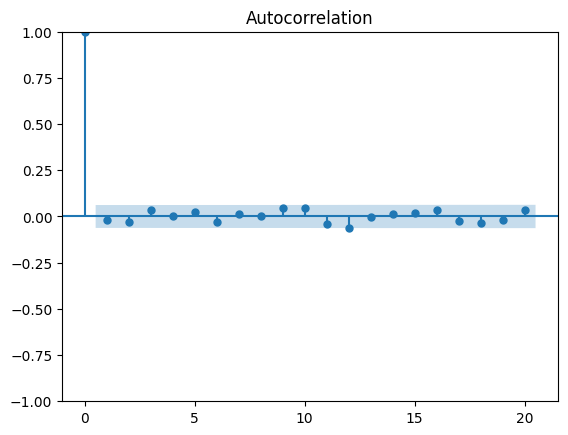

In [28]:
# Plot auto-correlation function of white noise returns
plot_acf(series, lags=20)
plt.show()

# Random walk

* Today's price = yesterday's price + noise.
* More theory in LyX. 

## Random walk - stock example

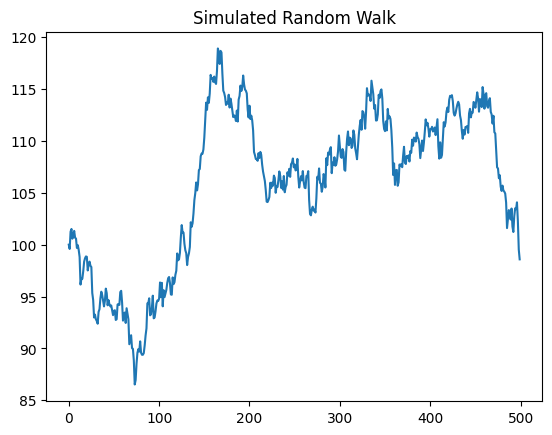

In [29]:
# Generate 500 random steps
steps = np.random.normal(loc=0, scale=1, size=500)
steps[0] = 0  # Set first step to 0

# Generate stock prices, P with a starting price of 100
P = 100 + np.cumsum(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk")
plt.show()

## Random walk with drift

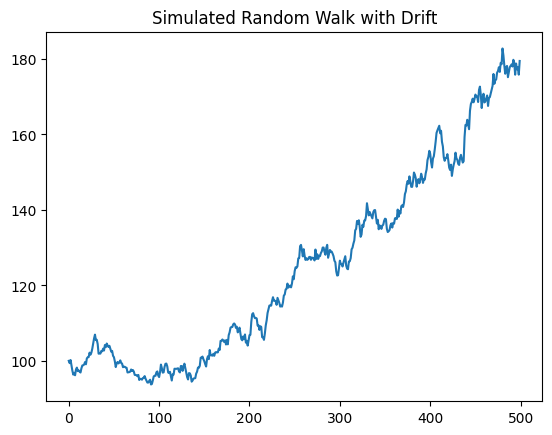

In [30]:
# Generate 500 random steps
steps = np.random.normal(loc=0.001, scale=0.01, size=500) + 1
steps[0] = 1  # Set 1st element to neutral

# Simulate the stock price, P
P = 100 * np.cumprod(steps)

# Plot the simulated stock prices
plt.plot(P)
plt.title("Simulated Random Walk with Drift")
plt.show()

In [35]:
from statsmodels.tsa.stattools import adfuller  # Augmented Dickey-Fuller (ADF) test for random walk

# ADF test 
results = adfuller(df['Earnings'])
print(f'The p-value of the test on prices is {results[1] * 100:.1f} %')

The p-value of the test on prices is 5.1 %


# Stationarity